In [16]:
'''
coding envrionment Python 3.5
'''
## common packages
import os, sys, importlib
# from __future__ import division # if you want to use python 2.x
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## machine learning packages
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier #GBC algorithm
from sklearn import linear_model, cross_validation, metrics   #Additional scklearn functions
from sklearn.metrics import roc_curve, auc

## in-house library
import Ensemble_library as ES
from Ensemble_tuned_parameters import *
ES = importlib.reload(ES)

## Doc2Vec Part

In [5]:
train_valid_data, test_data, predictors = ES.gbtDataCleasing(doc2Vec_file, test_portion, predictors_bm, y)

## Fit the Benchmark
# logistic model
logistic_bm = linear_model.LogisticRegression(penalty='l2', C = 0.01) ## C is tuned.
logistic_bm.fit(train_valid_data[predictors_bm],train_valid_data[y])

# gbt model
gbt_bm = GradientBoostingClassifier(**GBT_bm_params)
gbt_bm.fit(train_valid_data[predictors_bm],train_valid_data[y])

# rf model
rf_bm = RandomForestClassifier(**RF_bm_params)
rf_bm.fit(train_valid_data[predictors_bm],train_valid_data[y])

print("benchmark models fitting done")

## doc2vec model
# gbt
gbt_doc2vec = GradientBoostingClassifier(**GBT_Doc2Vec_params)
gbt_doc2vec.fit(train_valid_data[predictors],train_valid_data[y])

# rf
rf_doc2vec = RandomForestClassifier(**RF_Doc2Vec_params)
rf_doc2vec.fit(train_valid_data[predictors],train_valid_data[y])

Total DF shape:  (21344, 333)
The positive ratio is 0.4943
Data cleasing is comptled.
benchmark models fitting done


TypeError: __init__() got an unexpected keyword argument 'n_jobs'

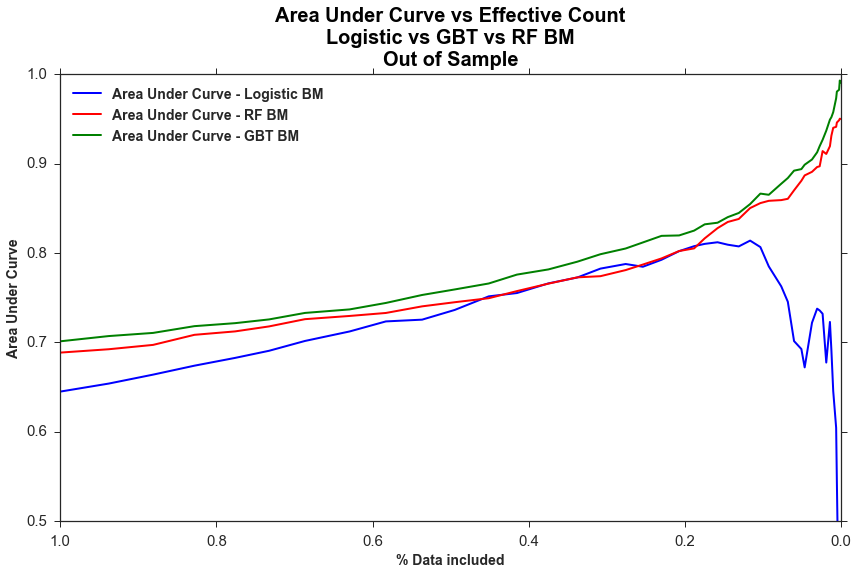

In [14]:
ES.AUCvsCountsPlot(logistic_bm, test_data, predictors_bm, y, 
                       model_name="Logistic BM", alg2=rf_bm, dtest2=test_data,
                       predictors2=predictors_bm, y2=y, model_name2="RF BM",
                       alg3=gbt_bm, dtest3=test_data,
                       predictors3=predictors_bm, y3=y, model_name3="GBT BM",
                       title_second_line = "Logistic vs GBT vs RF BM\nOut of Sample")

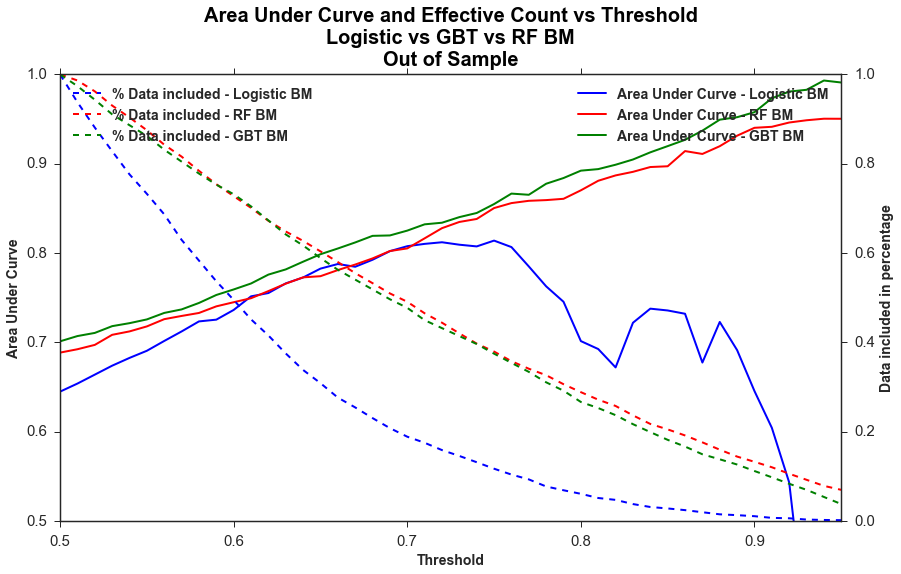

In [18]:
ES.AUCvsThresholdPlot(logistic_bm, test_data, predictors_bm, y, 
                       model_name="Logistic BM", alg2=rf_bm, dtest2=test_data,
                       predictors2=predictors_bm, y2=y, model_name2="RF BM",
                       alg3=gbt_bm, dtest3=test_data,
                       predictors3=predictors_bm, y3=y, model_name3="GBT BM",
                       title_second_line = "Logistic vs GBT vs RF BM\nOut of Sample")

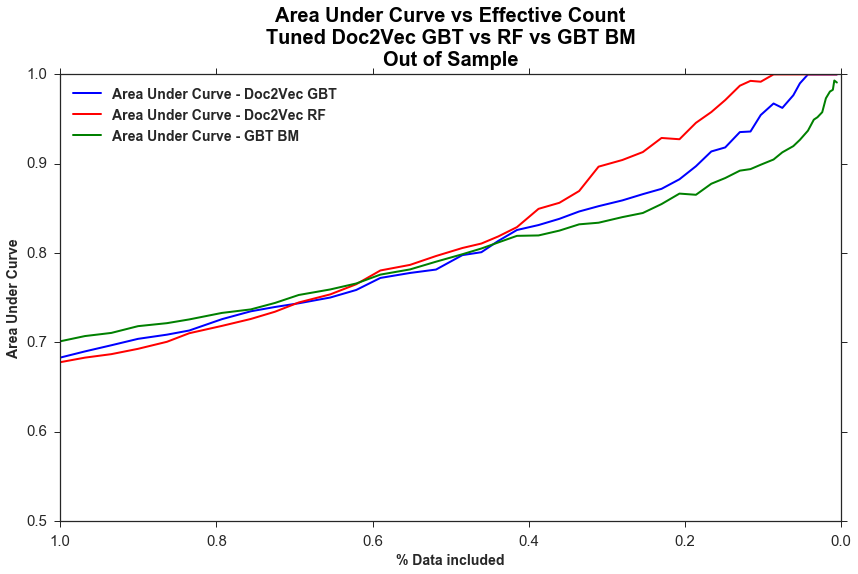

In [15]:
ES.AUCvsCountsPlot(gbt_doc2vec, test_data, predictors, y, 
                       model_name="Doc2Vec GBT", alg2=rf_doc2vec, dtest2=test_data,
                       predictors2=predictors, y2=y, model_name2="Doc2Vec RF",
                       alg3=gbt_bm, dtest3=test_data,
                       predictors3=predictors_bm, y3=y, model_name3="GBT BM",
                       title_second_line = "Tuned Doc2Vec GBT vs RF vs GBT BM\nOut of Sample")

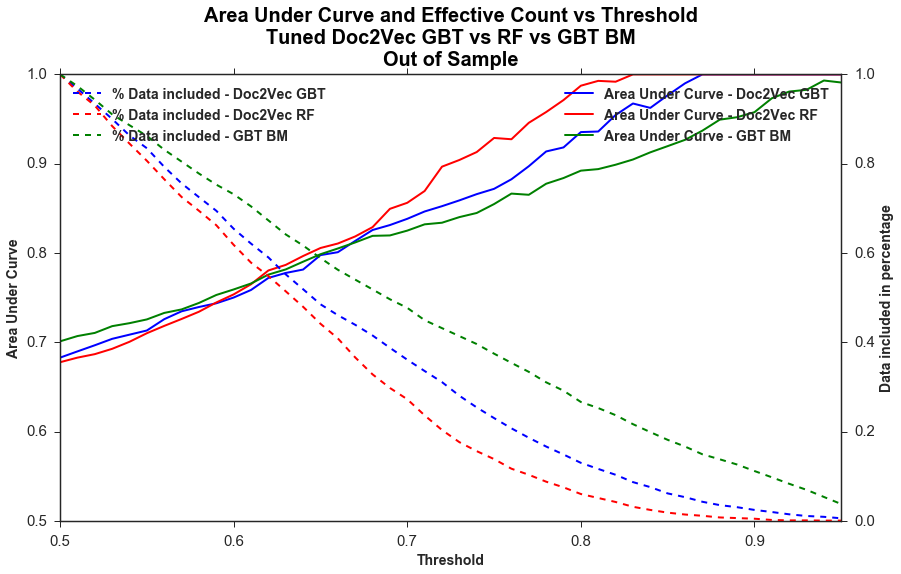

In [17]:
ES.AUCvsThresholdPlot(gbt_doc2vec, test_data, predictors, y, 
                       model_name="Doc2Vec GBT", alg2=rf_doc2vec, dtest2=test_data,
                       predictors2=predictors, y2=y, model_name2="Doc2Vec RF",
                       alg3=gbt_bm, dtest3=test_data,
                       predictors3=predictors_bm, y3=y, model_name3="GBT BM",
                       title_second_line = "Tuned Doc2Vec GBT vs RF vs GBT BM\nOut of Sample")

## Bag of Words Part
### Adverbs and  BM

In [19]:
train_valid_data, test_data, predictors = ES.gbtDataCleasing(adv_file, test_portion, predictors_bm, y, 
                                                             feature_start=3,feature_end=302)

# BOW Adv
gbt_adv = GradientBoostingClassifier(**GBT_adv_params)
gbt_adv.fit(train_valid_data[predictors],train_valid_data[y])

# gbt model
gbt_bm = GradientBoostingClassifier(**GBT_bm_params)
gbt_bm.fit(train_valid_data[predictors_bm],train_valid_data[y])

# rf model
rf_bm = RandomForestClassifier(**RF_bm_params)
rf_bm.fit(train_valid_data[predictors_bm],train_valid_data[y])

rf_adv = RandomForestClassifier(**RF_adv_params)
rf_adv.fit(train_valid_data[predictors],train_valid_data[y])

Total DF shape:  (23005, 339)
The positive ratio is 0.4543
Data cleasing is comptled.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features=95, max_leaf_nodes=None,
            min_samples_leaf=30, min_samples_split=23.005,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=True, random_state=10, verbose=0, warm_start=False)

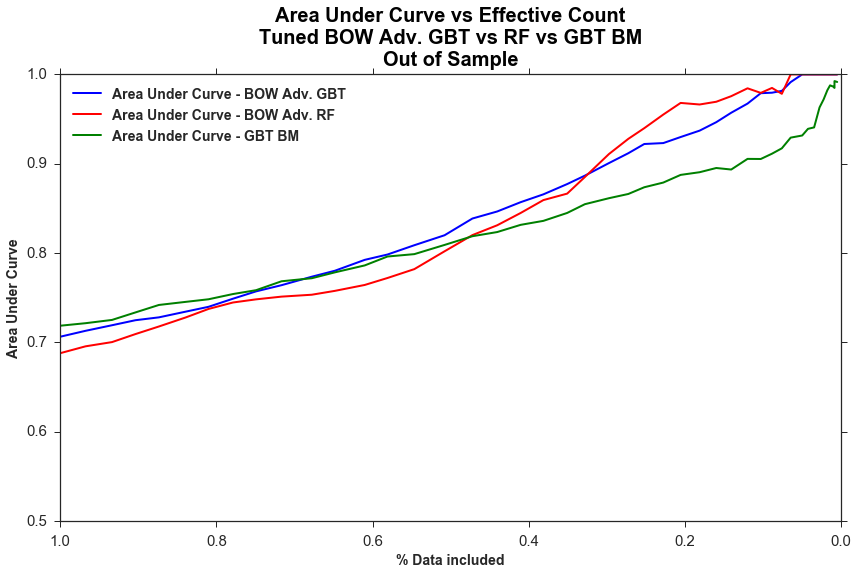

In [24]:
ES.AUCvsCountsPlot(gbt_doc2vec, test_data, predictors, y, 
                       model_name="BOW Adv. GBT", alg2=rf_doc2vec, dtest2=test_data,
                       predictors2=predictors, y2=y, model_name2="BOW Adv. RF",
                       alg3=gbt_bm, dtest3=test_data,
                       predictors3=predictors_bm, y3=y, model_name3="GBT BM",
                       title_second_line = "Tuned BOW Adv. GBT vs RF vs GBT BM\nOut of Sample")

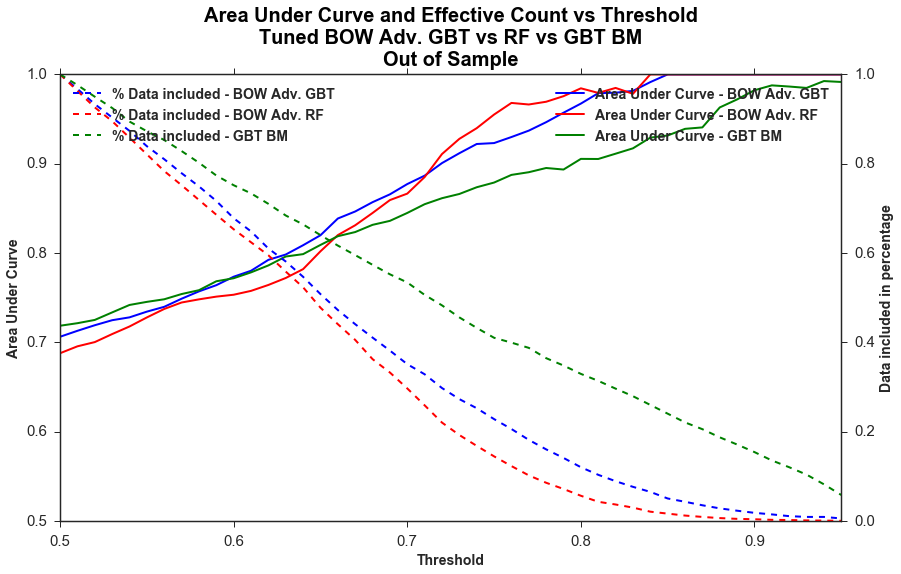

In [22]:
ES.AUCvsThresholdPlot(gbt_doc2vec, test_data, predictors, y, 
                       model_name="BOW Adv. GBT", alg2=rf_doc2vec, dtest2=test_data,
                       predictors2=predictors, y2=y, model_name2="BOW Adv. RF",
                       alg3=gbt_bm, dtest3=test_data,
                       predictors3=predictors_bm, y3=y, model_name3="GBT BM",
                       title_second_line = "Tuned BOW Adv. GBT vs RF vs GBT BM\nOut of Sample")


Model Report
Accuracy : 0.7573
AUC Score (Train): 0.843065
CV Score : Mean - 0.775071 | Std - 0.005392267 | Min - 0.7697361 | Max - 0.7829365


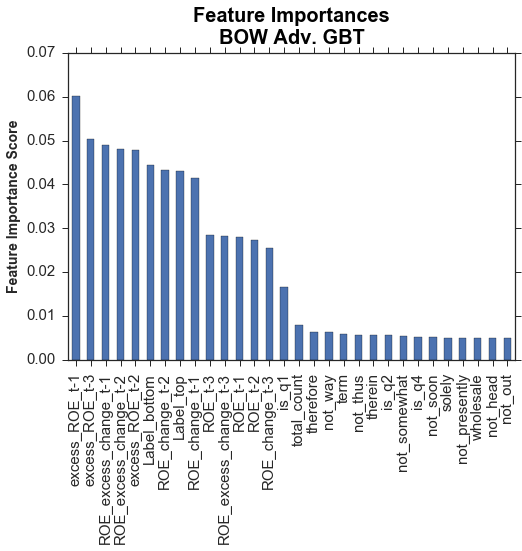

In [26]:
ES.modelfit(gbt_bm, train_valid_data, predictors, y, model_name="BOW Adv. GBT")